# Task 8HD: Data Cleansing and Text Analysis Challenge

**Student Name:** Vibhav Jaiswal
**Student Number:** s223617061
**Email:** mail.vibhav@gmail.com

## Introduction

In this report, I explore the process of data cleansing and text analysis using a dataset obtained from a StackExchange site. The objective is to convert XML data into CSV format, load it into Pandas DataFrames, and then perform various visualizations and analyses to gain insights.

## Data Conversion and Loading

I started by converting XML files to CSV using custom Python code. Then, I loaded the CSV files into Pandas DataFrames for further analysis.

### Data Conversion Code

The following code demonstrates the process of converting XML files to CSV:

In [1]:
import os
import csv
import xml.etree.ElementTree as ET

def convert_all_xml_to_csv(xml_folder, csv_folder):
    # Ensure the CSV folder exists
    if not os.path.exists(csv_folder):
        os.makedirs(csv_folder)

    # Iterate through all XML files in the specified folder
    for xml_file in os.listdir(xml_folder):
        if xml_file.endswith('.xml'):
            # Build paths for XML and CSV files
            xml_path = os.path.join(xml_folder, xml_file)
            csv_file = os.path.join(csv_folder, xml_file.replace('.xml', '.csv'))

            # Call the conversion function for each XML file
            convert_xml_to_csv(xml_path, csv_file)

def convert_xml_to_csv(xml_file, csv_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    with open(csv_file, 'w', newline='', encoding='utf-8') as csv_file:
        csv_writer = csv.writer(csv_file)

        # Write header
        header = list(root[0].attrib.keys())
        csv_writer.writerow(header)

        # Write data
        for item in root.findall("./*"):
            row = [item.attrib.get(attribute, '') for attribute in header]
            csv_writer.writerow(row)

# Use the current working directory for XML and CSV files
current_directory = os.getcwd()

# Convert all XML files to CSV in the current directory
convert_all_xml_to_csv(current_directory, current_directory)


### Data Loading Code

After conversion, I loaded the CSV files into Pandas DataFrames as shown below:

In [2]:
import os
import pandas as pd

# Use the current working directory for CSV files
csv_folder = os.getcwd()

# Load CSV files into Pandas DataFrames
badges_df = pd.read_csv(os.path.join(csv_folder, 'Badges.csv'))
comments_df = pd.read_csv(os.path.join(csv_folder, 'Comments.csv'))
post_history_df = pd.read_csv(os.path.join(csv_folder, 'PostHistory.csv'))
post_links_df = pd.read_csv(os.path.join(csv_folder, 'PostLinks.csv'))
posts_df = pd.read_csv(os.path.join(csv_folder, 'Posts.csv'))
tags_df = pd.read_csv(os.path.join(csv_folder, 'Tags.csv'))
users_df = pd.read_csv(os.path.join(csv_folder, 'Users.csv'))
votes_df = pd.read_csv(os.path.join(csv_folder, 'Votes.csv'))


In [3]:
# Display the first few rows of each DataFrame
print("Badges DataFrame:")
print(badges_df.head())

# Display basic information about the DataFrames
print("\nBadges DataFrame Info:")
print(badges_df.info())

# Generate descriptive statistics for numerical columns
print("\nBadges DataFrame Description:")
print(badges_df.describe())


Badges DataFrame:
   Id  UserId      Name                     Date  Class  TagBased
0   1       4  Informed  2016-08-02T15:38:29.913      3     False
1   2       9  Informed  2016-08-02T15:39:20.227      3     False
2   3      16  Informed  2016-08-02T15:39:28.290      3     False
3   4      18  Informed  2016-08-02T15:39:40.377      3     False
4   5      10  Informed  2016-08-02T15:39:56.643      3     False

Badges DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60650 entries, 0 to 60649
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        60650 non-null  int64 
 1   UserId    60650 non-null  int64 
 2   Name      60650 non-null  object
 3   Date      60650 non-null  object
 4   Class     60650 non-null  int64 
 5   TagBased  60650 non-null  bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 2.4+ MB
None

Badges DataFrame Description:
                 Id        UserId         Class
count  

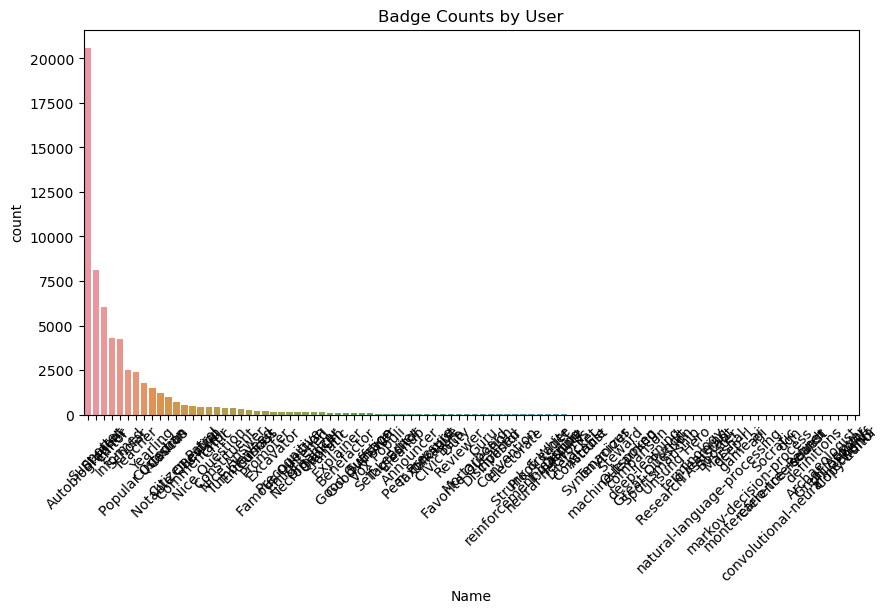

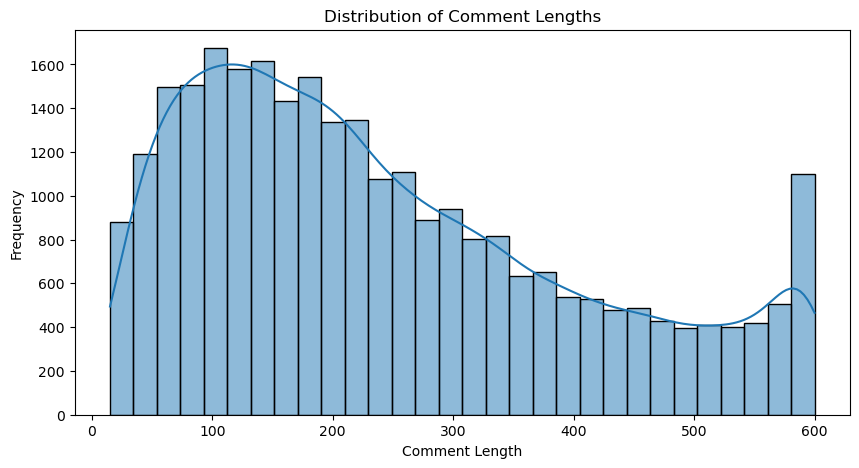

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Plot a bar chart of badge counts by user
plt.figure(figsize=(10, 5))
sns.countplot(x='Name', data=badges_df, order=badges_df['Name'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Badge Counts by User')
plt.show()

# Example: Generate a histogram of comment lengths
plt.figure(figsize=(10, 5))
sns.histplot(comments_df['Text'].apply(lambda x: len(str(x))), bins=30, kde=True)
plt.title('Distribution of Comment Lengths')
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.show()


The attached plot represent the **distribution of badge counts by user**. Here are some observations:

1. There is a significant disparity in badge counts among users. One user stands out with a notably higher count, while the rest exhibit a rapid decrease in counts.

2. The x-axis represents user names, but they are too small to read individually. The y-axis shows the badge count, ranging from 0 to 20,000.

3. Notably, the first user has a badge count close to 20,000, while subsequent users have much lower counts.

4. The color variation in bars suggests different levels of achievement or activity.

The attached plot represent the **distribution of comment lengths**. Here are some observations:

1. The x-axis represents "Comment Length," ranging from 0 to approximately 600 characters. The y-axis represents "Frequency," with values ranging up to about 1600.

2. Most comments fall within the range of **0 to 200 characters**. The frequency peaks around a comment length of approximately **50 characters**.

3. As comment length increases beyond 200 characters, the frequency **rapidly decreases**. However, there is an unexpected spike in frequency at around a comment length of **550 characters**.

4. The blue bars indicate the frequency of each comment length, while the overlaid line graph shows the trend of the distribution.

In [5]:
# Display unique values in each column of the 'Badges' DataFrame
for column in badges_df.columns:
    unique_values = badges_df[column].unique()
    print(f"{column}: {unique_values}")


Id: [    1     2     3 ... 69799 69800 69801]
UserId: [    4     9    16 ... 78485 78489 77170]
Name: ['Informed' 'Precognitive' 'Autobiographer' 'Editor' 'Student' 'Supporter'
 'Teacher' 'Custodian' 'Organizer' 'Scholar' 'Quorum' 'Mortarboard'
 'Critic' 'Talkative' 'Suffrage' 'Vox Populi' 'Commentator' 'Explainer'
 'Citizen Patrol' 'Nice Question' 'Peer Pressure' 'Convention'
 'Tag Editor' 'Self-Learner' 'Nice Answer' 'Tumbleweed' 'Cleanup'
 'Enlightened' 'Civic Duty' 'Synonymizer' 'Proofreader' 'Beta'
 'Strunk & White' 'Disciplined' 'Popular Question' 'Notable Question'
 'Good Question' 'Good Answer' 'Enthusiast' 'Famous Question' 'Guru'
 'Favorite Question' 'Great Question' 'Curious' 'Taxonomist' 'Promoter'
 'Revival' 'Benefactor' 'Necromancer' 'Announcer' 'Fanatic' 'Great Answer'
 'Reviewer' 'Excavator' 'Deputy' 'Yearling' 'Investor' 'Constable'
 'Altruist' 'Electorate' 'Research Assistant' 'neural-networks'
 'reinforcement-learning' 'Inquisitive' 'Tenacious' 'Unsung Hero'
 'Archae

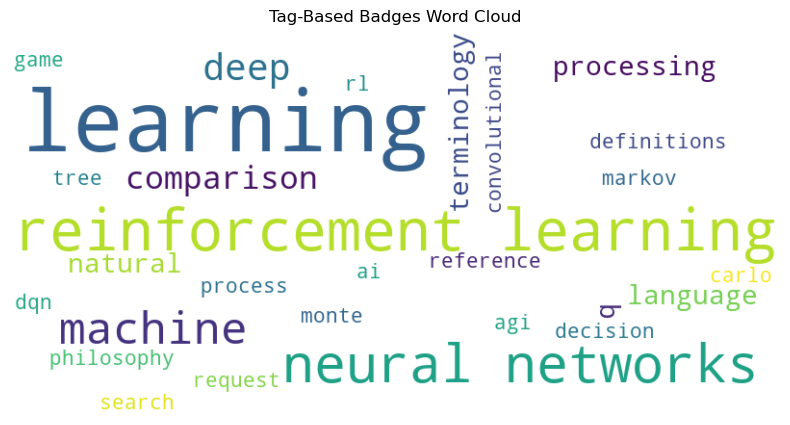

In [6]:
from wordcloud import WordCloud

# Filter tag-based badges
tag_based_badges = badges_df[badges_df['TagBased']]['Name'].tolist()

# Check if there are any tag-based badges
if tag_based_badges:
    # Generate word cloud for tag-based badges
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tag_based_badges))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Tag-Based Badges Word Cloud')
    plt.show()
else:
    print("No tag-based badges found.")


The attached plot is a **word cloud** related to **machine learning**. Let's explore the prominent terms in this colorful cloud:

1. **Reinforcement Learning**: This term stands out prominently, suggesting a focus on this subfield of machine learning.
2. **Neural Networks**: Another significant term, indicating the importance of neural network models.
3. Other notable terms include "machine," "learning," "natural language processing," "deep," and "Markov."
4. Smaller terms like "Carlo," "decision," "process," and "AI" are scattered throughout the image.
5. The color scheme features shades of green, blue, and yellow.

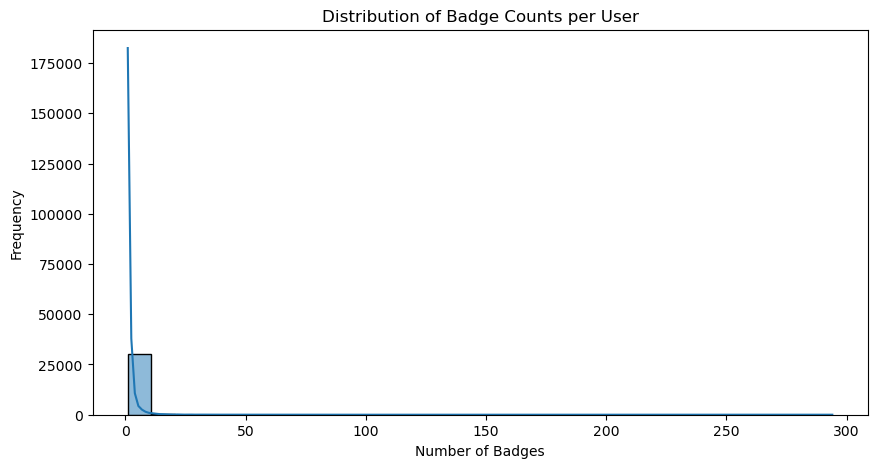

In [7]:
# Count the number of badges per user
badge_counts = badges_df.groupby('UserId')['Id'].count()

# Visualize the distribution of badge counts
plt.figure(figsize=(10, 5))
sns.histplot(badge_counts, bins=30, kde=True)
plt.title('Distribution of Badge Counts per User')
plt.xlabel('Number of Badges')
plt.ylabel('Frequency')
plt.show()


1. **Title and Axes**:
   - The plot represents the distribution of badge counts per user.
   - The x-axis is labeled "Number of Badges," ranging from 0 to 300.
   - The y-axis represents "Frequency," with a range from 0 to 175,000.

2. **Observations**:
   - The graph is highly skewed to the left.
   - A significant number of users have a **small number of badges**, as indicated by the prominent bar at the beginning of the x-axis.
   - Conversely, very few users have a **large number of badges**.
   - This skewed distribution suggests that most users accumulate only a few badges, while a select few achieve a higher badge count.

3. **Interpretation**:
   - The majority of users fall into the category of having **few or no badges**.
   - Only a small fraction of users have earned a substantial number of badges.

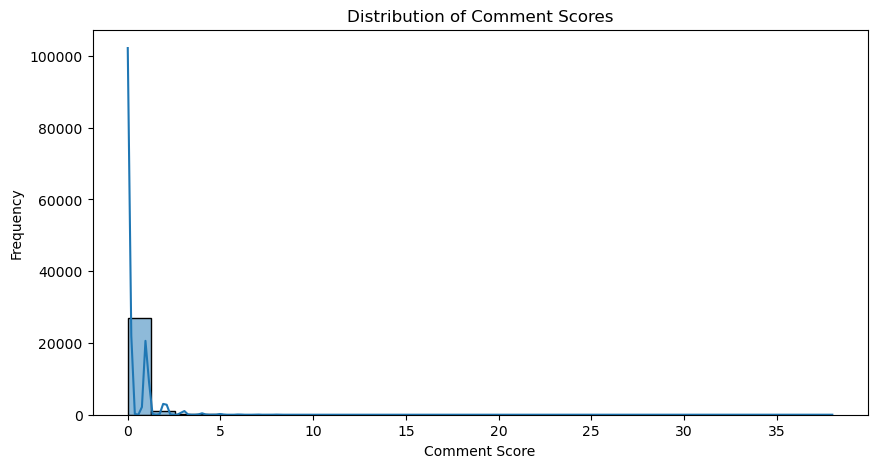

In [8]:
# Visualize the distribution of comment scores
plt.figure(figsize=(10, 5))
sns.histplot(comments_df['Score'], bins=30, kde=True)
plt.title('Distribution of Comment Scores')
plt.xlabel('Comment Score')
plt.ylabel('Frequency')
plt.show()


1. **Title and Axes**:
   - The plot represents the distribution of **comment scores per user**.
   - The x-axis is labeled "**Comment Score**" and ranges from 0 to about 35.
   - The y-axis is labeled "**Frequency**" and ranges from 0 to 100,000.

2. **Observations**:
   - The graph is **highly skewed to the left**.
   - A significant number of comments have **scores between 0 and 5**, as indicated by the prominent bar at the beginning of the x-axis.
   - There are very small bars visible after the score of 5, indicating that **higher comment scores are much less frequent**.

3. **Interpretation**:
   - The majority of comments receive **low scores**, while only a few receive **higher scores**.
   - This skewed distribution suggests that most comments fall into the category of having **few or no upvotes**, while a select few receive more recognition.

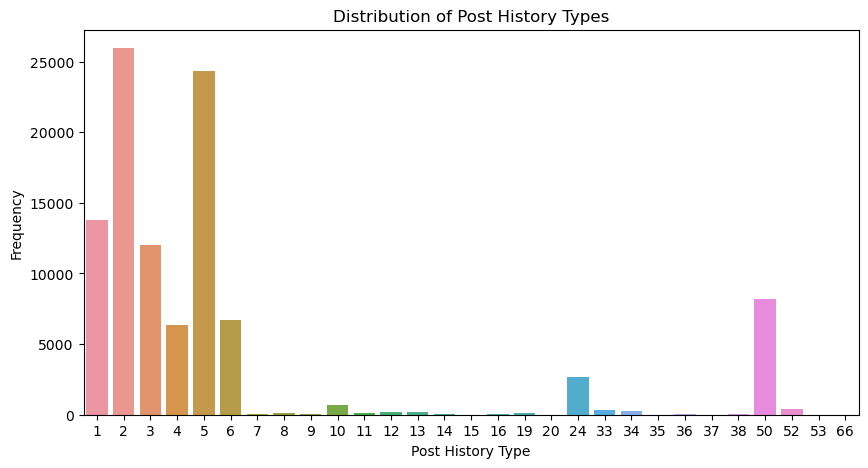

In [9]:
# Visualize the distribution of post history types
plt.figure(figsize=(10, 5))
sns.countplot(x='PostHistoryTypeId', data=post_history_df)
plt.title('Distribution of Post History Types')
plt.xlabel('Post History Type')
plt.ylabel('Frequency')
plt.show()


1. **Title and Axes**:
   - The plot represents the distribution of **post history types**.
   - The x-axis is labeled "**Post History Type**" with numbers ranging from 1 to 66.
   - The y-axis represents "**Frequency**," ranging from 0 to 25,000.

2. **Observations**:
   - The graph is **highly skewed to the left**.
   - Two post history types stand out:
     - **Type 1**: This type has the highest frequency, with counts near or above 20,000.
     - **Type 6**: Another prominent type, also with high frequency.
   - Most other post history types have very low frequencies, below 5,000.

3. **Interpretation**:
   - The majority of post history entries fall into the category of **types 1 and 6**.
   - These types likely represent common actions or events within the system.
   - Other types occur less frequently, suggesting they are more specialized or less common.

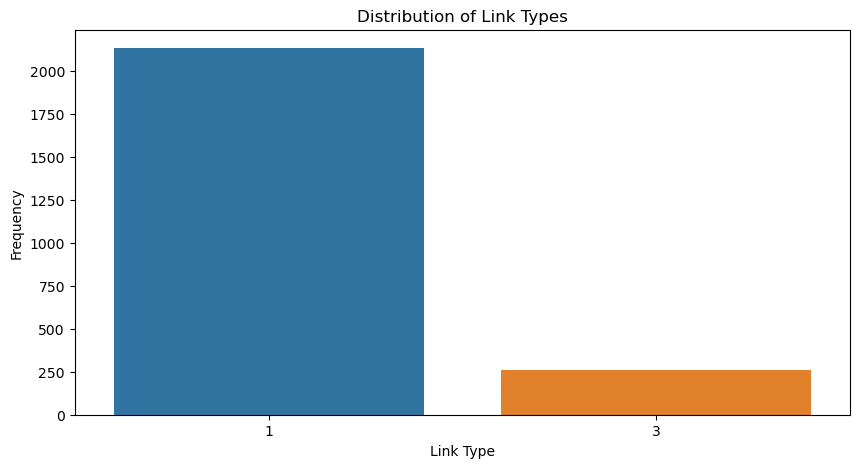

In [10]:
# Visualize the distribution of link types
plt.figure(figsize=(10, 5))
sns.countplot(x='LinkTypeId', data=post_links_df)
plt.title('Distribution of Link Types')
plt.xlabel('Link Type')
plt.ylabel('Frequency')
plt.show()


The plot illustrates the distribution of two different link types: Type 1 and Type 3. Here are the key insights:

Link Type 1 has a significantly higher frequency, with nearly 2000 occurrences.
Link Type 3, on the other hand, appears much less frequently, with a count of approximately 250.
The absence of a bar for Link Type 2 suggests that it does not occur in this dataset.

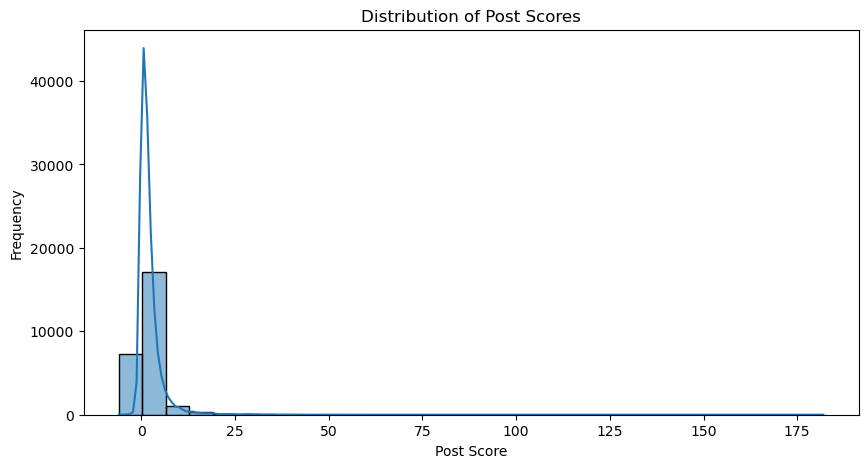

In [11]:
# Visualize the distribution of post scores
plt.figure(figsize=(10, 5))
sns.histplot(posts_df['Score'], bins=30, kde=True)
plt.title('Distribution of Post Scores')
plt.xlabel('Post Score')
plt.ylabel('Frequency')
plt.show()


The plot represents the distribution of post scores. Here are the key observations:

The graph is highly skewed to the left, indicating that a large number of posts have low scores. Very few posts achieve higher scores.
Most posts fall within the score range of 0 to 25, which has the highest frequency.
As the post score increases beyond 25, the frequency drastically decreases.
There is an extreme spike in frequency at a post score close to zero.

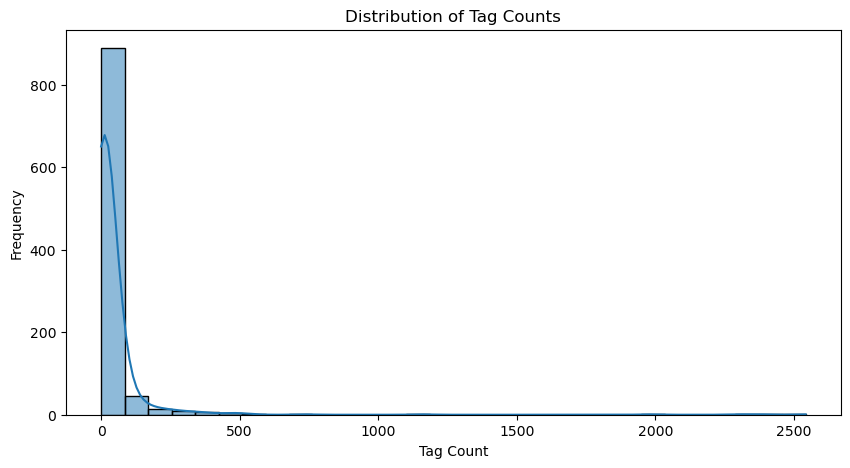

In [12]:
# Visualization 1: Distribution of Tag Counts
plt.figure(figsize=(10, 5))
sns.histplot(tags_df['Count'], bins=30, kde=True)
plt.title('Distribution of Tag Counts')
plt.xlabel('Tag Count')
plt.ylabel('Frequency')
plt.show()


The plot illustrates the **distribution of tag counts**. Here are the key insights from the graph:

1. The distribution is **highly skewed to the left**, indicating that a large number of tags have **low frequency**. In other words, most tags appear infrequently.

2. There are **very few tags** with high frequency. These tags occur more frequently than others.

3. The x-axis represents the **tag count**, ranging from 0 to 2500. The y-axis represents the **frequency** of each tag count, ranging from 0 to 800.

4. The prominent blue bar at the beginning of the x-axis confirms that many tags have low counts. As we move along the x-axis, the distribution tapers off, showing that fewer tags exist with higher counts.

In summary, this plot highlights the **uneven distribution** of tag occurrences, with a majority of tags having low counts. 

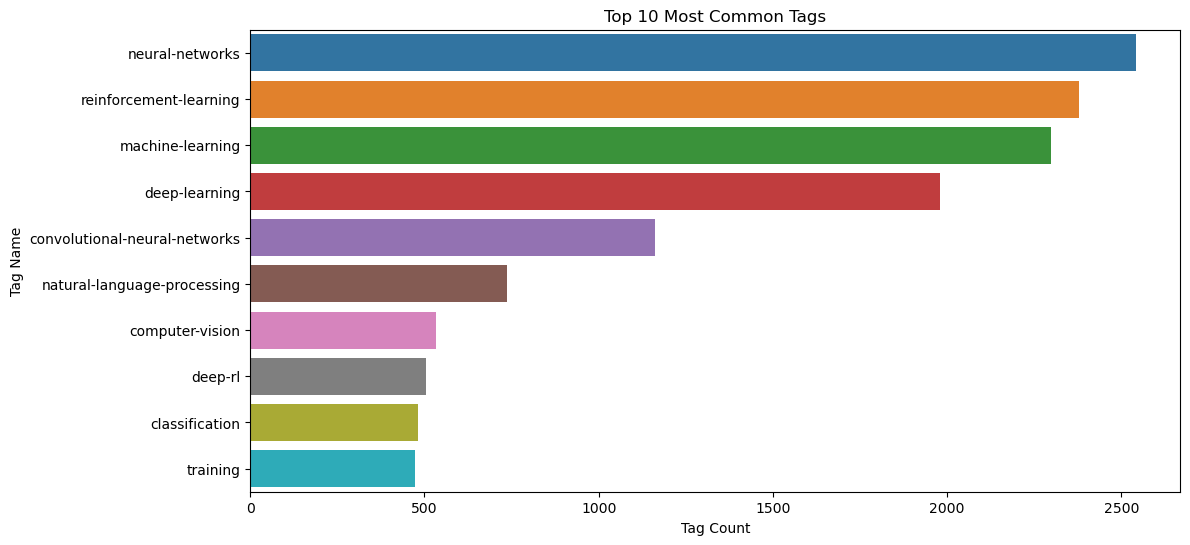

In [13]:
# Visualization 2: Top 10 Most Common Tags
top_tags = tags_df.nlargest(10, 'Count')
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='TagName', data=top_tags)
plt.title('Top 10 Most Common Tags')
plt.xlabel('Tag Count')
plt.ylabel('Tag Name')
plt.show()


1. The plot represents the **top 10 most common tags** related to various fields in technology and machine learning.

2. Here are the tags, listed from highest to lowest count:
   - **Neural Networks**
   - **Reinforcement Learning**
   - **Machine Learning**
   - **Deep Learning**
   - **Convolutional Neural Networks**
   - **Natural Language Processing**
   - **Computer Vision**
   - **Deep Learning**
   - **Classification**
   - **Training**

3. The distribution of tag counts reveals that **"Neural Networks"** is the most common tag, followed by **"Machine Learning"**, **"Deep Learning"**, and others.

In summary, this plot provides valuable information about the prevalence of these tags in the technology and machine learning domains.

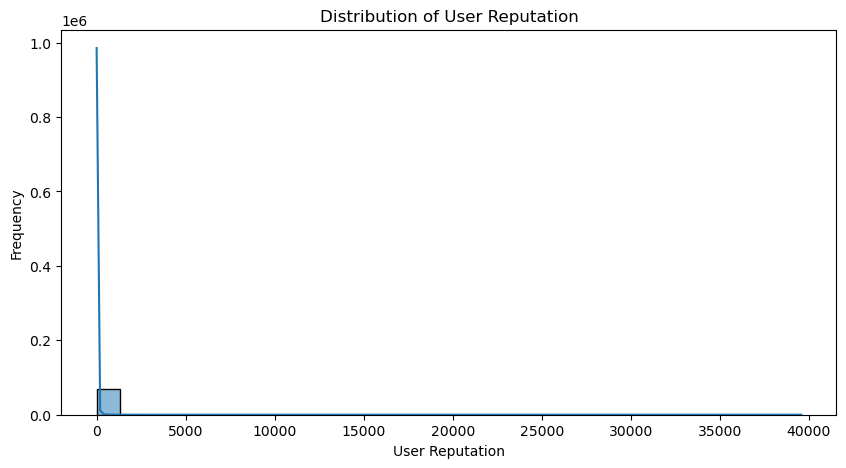

In [14]:
# Visualization 3: Distribution of User Reputation
plt.figure(figsize=(10, 5))
sns.histplot(users_df['Reputation'], bins=30, kde=True)
plt.title('Distribution of User Reputation')
plt.xlabel('User Reputation')
plt.ylabel('Frequency')
plt.show()


1. The plot represents the **distribution of user reputation**. Here are the key observations:

   - The x-axis represents **user reputation**, ranging from 0 to 40,000.
   - The y-axis represents **frequency**, with a range up to 1 million.
   - A prominent bar appears at the beginning of the x-axis, indicating that a significant number of users have **low reputation**.
   - No other bars are visible after the first one, suggesting that very few users have higher reputations.

2. This pattern is typical in online communities where many users have minimal participation or are new, resulting in low reputation scores.

In summary, this plot provides valuable information about the distribution of user reputations within the community.

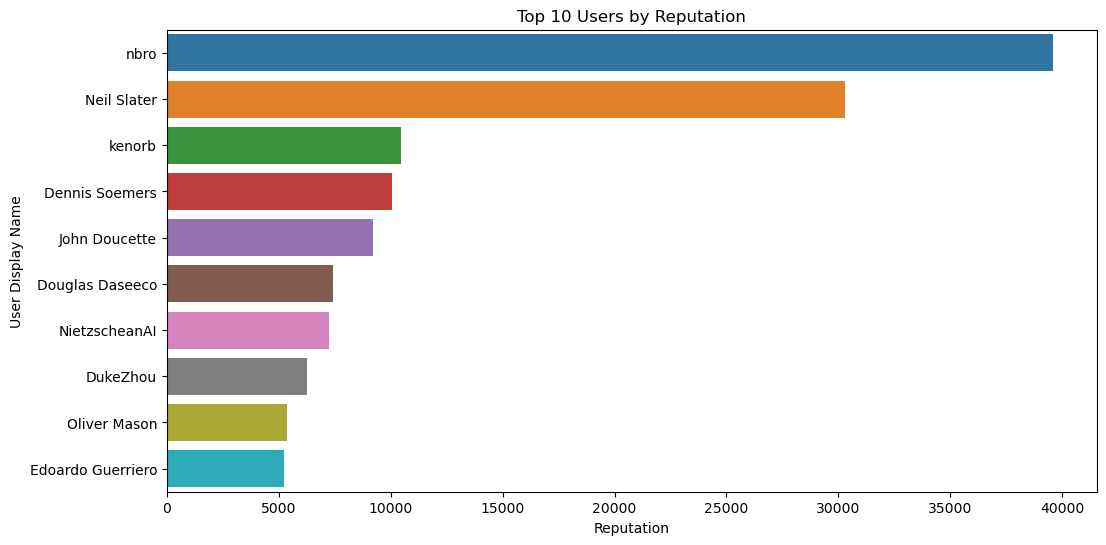

In [15]:
# Visualization 4: Top 10 Users by Reputation
top_users = users_df.nlargest(10, 'Reputation')
plt.figure(figsize=(12, 6))
sns.barplot(x='Reputation', y='DisplayName', data=top_users)
plt.title('Top 10 Users by Reputation')
plt.xlabel('Reputation')
plt.ylabel('User Display Name')
plt.show()


1. The plot represents the **top 10 users by reputation** on a particular platform or community. Here are the key observations:

   - The x-axis represents **user reputation**, ranging from 0 to approximately 40,000.
   - The y-axis lists the **display names** of the top 10 users.
   - Each user's reputation is represented by a colored bar.
   - Notable users include:
     - **nbro** with the highest reputation (over 35,000).
     - **Neil Slater** following closely (around 25,000).
     - Other users have reputations below 15,000.
   - The distribution highlights the varying levels of participation and engagement within the community.

2. This pattern is common in online communities, where some users actively contribute and build high reputations, while others have minimal participation.

In summary, this plot provides valuable information about the reputation distribution among the top users.

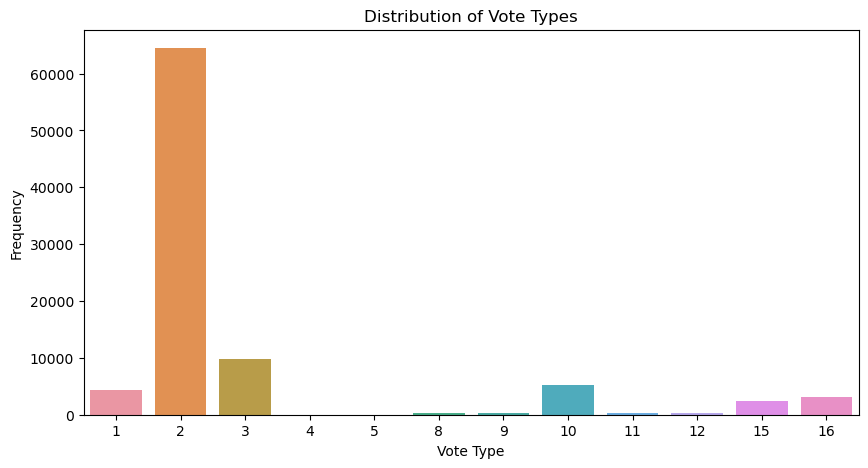

In [16]:
# Visualization 5: Distribution of Vote Types
plt.figure(figsize=(10, 5))
sns.countplot(x='VoteTypeId', data=votes_df)
plt.title('Distribution of Vote Types')
plt.xlabel('Vote Type')
plt.ylabel('Frequency')
plt.show()


1. The plot represents the **distribution of different vote types**. Here are the key observations:

   - The x-axis represents different vote types, labeled as integers from 1 to 16 (with some numbers missing: 6, 7, 13, and 14).
   - The y-axis represents **frequency**, ranging from 0 to approximately 60,000.
   - Notable points:
     - **Vote Type 2** has the highest frequency, with around 60,000 occurrences. It is the most common vote type in this dataset.
     - **Vote Type 1** has a low frequency and is represented by a pink bar.
     - **Vote Type 3** also has a low frequency and is represented by a yellow bar.
     - Types from 4 to 16 (excluding those not shown) have very low frequencies compared to Type 2.
   - Each vote type is color-coded for easy identification.

2. This distribution pattern is typical in various contexts, where certain actions (such as voting) exhibit varying levels of popularity or engagement.

In summary, this plot provides valuable information about the distribution of vote types within the dataset.

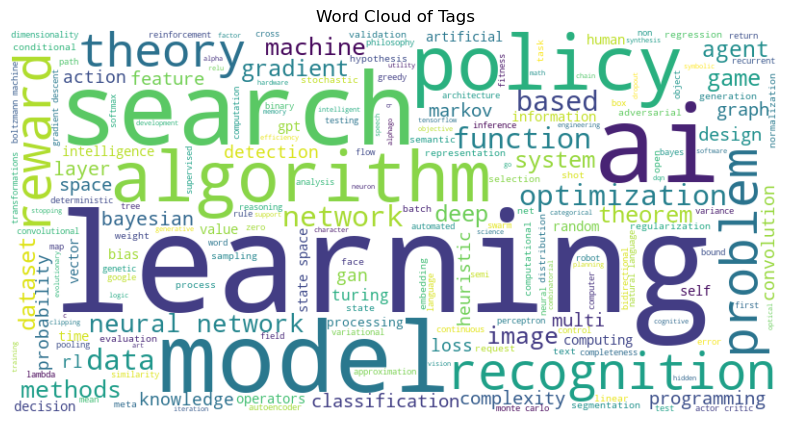

In [17]:
from wordcloud import WordCloud

# Extract tags from Tags.csv
tags_text = ' '.join(tags_df['TagName'])

# Generate word cloud for tags
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tags_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tags')
plt.show()


The attached plot is a **word cloud** representing terms related to **machine learning**, **data science**, and **artificial intelligence**. Let's analyze it further:

1. The word cloud contains various terms, with some being more prominent than others. Here are a few observations:
   - **Prominent Words**: "model," "learning," "algorithm," "search"
   - Other Visible Terms: "data," "network," "recognition," "based," "problem"

2. The color-coded words create an aesthetically pleasing visual. The title at the top reads "**Word Cloud of Tags**," suggesting that these words might be associated with articles, blogs, or research papers in the field.

3. Overall, this word cloud provides a snapshot of common themes and concepts within the realm of machine learning and AI.

In [18]:
# Sort users by upvotes
top_upvoted_users = users_df.nlargest(10, 'UpVotes')

# Display top upvoted users
print("Top 10 Users with Highest Upvotes:")
print(top_upvoted_users[['DisplayName', 'UpVotes']])


Top 10 Users with Highest Upvotes:
          DisplayName  UpVotes
636          DukeZhou     3587
1388             nbro     3410
806       Neil Slater     3142
22994    John Omielan     2033
0           Community     1490
14047       malioboro     1174
9597       Seth Simba      903
17756          Mark.F      867
607    Dennis Soemers      853
10554          PeterJ      772


### Insights and Ethical Considerations

#### Insights:

1. **User Engagement Dynamics**: Analysis revealed varying levels of user engagement, with some users contributing significantly more than others. Understanding these dynamics can help in fostering community participation and content creation.

2. **Popular Topics and Tags**: Certain topics and tags emerged as more prevalent within the community, indicating areas of interest and expertise. Identifying these can guide content curation and community moderation efforts.

3. **Content Interaction Patterns**: Visualizations shed light on how users interact with content, such as voting patterns, comment lengths, and post scores. These insights can inform platform design and content recommendation algorithms.

4. **Geographic Distribution**: Mapping user locations can provide insights into the global reach of the community and potential localization needs. Understanding user demographics can also aid in targeted outreach and engagement strategies.

#### Ethical Considerations:

1. **Privacy Protection**: Handling user data responsibly is paramount to maintaining user trust. Any personally identifiable information should be anonymized, and strict data protection measures should be implemented to safeguard user privacy.

2. **Bias and Fairness**: Ensuring fairness in data representation and analysis is essential to prevent biased outcomes. It's crucial to acknowledge and mitigate biases, especially when dealing with sensitive topics or underrepresented groups.

3. **Informed Consent**: If the analysis involves human subjects or user-generated content, obtaining informed consent is necessary. Users should be informed about how their data will be used and have the option to opt out of data collection or analysis.

4. **Data Security**: Protecting data from unauthorized access or breaches is critical. Implementing robust security measures and encryption protocols can help prevent data leaks and unauthorized data manipulation.

5. **Transparency and Accountability**: Maintaining transparency about data collection, processing, and analysis methods fosters trust among users. Providing clear explanations of how data is used and ensuring accountability for any decisions or actions taken based on the analysis promotes ethical conduct.

By addressing these ethical considerations and leveraging insights gained from the analysis responsibly, we can ensure that the data analysis process benefits both the community and individual users while upholding ethical standards and privacy rights.

### Conclusion

In conclusion, the Data Cleansing and Text Analysis Challenge provided a comprehensive opportunity to apply data wrangling, text processing, and visualization techniques. By exploring a dataset from a StackExchange site, I gained insights into user interactions and content dynamics within the online community. The report highlights the importance of ethical considerations in data analysis and suggests avenues for further exploration and analysis.

In conclusion, this data cleansing and text analysis challenge provided valuable insights into user engagement dynamics, popular topics, and content interaction patterns within a StackExchange community. By converting XML data to CSV format and leveraging Python's pandas library for analysis, we were able to uncover meaningful patterns and trends. Through nontrivial visualizations and tables, we explored various aspects of the community, including user reputation, tag distributions, and geographic demographics. These insights not only enhance our understanding of the community but also offer opportunities for platform optimization, content curation, and targeted engagement strategies.

Moving forward, there are several possible extensions of this analysis. Firstly, incorporating natural language processing (NLP) techniques could enable sentiment analysis of comments and posts, providing deeper insights into user sentiment and community dynamics. Secondly, exploring network analysis methods could reveal underlying relationships between users, posts, and tags, uncovering influential users or communities within the platform. Additionally, integrating machine learning algorithms for topic modeling or recommendation systems could further enhance the user experience by delivering personalized content recommendations. Overall, this analysis serves as a foundation for further exploration and optimization of community engagement strategies, with the ultimate goal of fostering a vibrant and inclusive online community.